# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xg
import warnings
warnings.filterwarnings('ignore')

# Getting Data Information

In [2]:
dataset = pd.read_csv('NBA.csv')

In [3]:
dataset.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [4]:
dataset.shape

(464, 15)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB


In [6]:
dataset.describe()

,rating,draft_year
count,464.000000,464.000000
mean,77.568966,2013.892241
std,6.933780,3.997465
min,67.000000,2001.000000
25%,73.000000,2011.000000
50%,76.000000,2015.000000
75%,80.000000,2017.000000
max,97.000000,2019.000000


# Handling Attributes

In [7]:
dataset.isnull().sum()

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        76
version         0
dtype: int64

In [8]:
dataset = dataset.drop(['full_name','b_day','weight','height','college','version'],axis=1)
dataset.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
0,97,#23,Los Angeles Lakers,F,$37436858,USA,2003,1,1
1,97,#2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
2,96,#34,Milwaukee Bucks,F-G,$25842697,Greece,2013,1,15
3,96,#7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,#13,Houston Rockets,G,$38199000,USA,2009,1,3


In [9]:
dataset.isnull().sum()

rating          0
jersey          0
team           23
position        0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
dtype: int64

In [10]:
dataset=dataset.dropna()
dataset.isnull().sum()

rating         0
jersey         0
team           0
position       0
salary         0
country        0
draft_year     0
draft_round    0
draft_peak     0
dtype: int64

In [11]:
dataset.shape

(441, 9)

# Data Pre-Processing

In [12]:
def remove(value):
    value=value[1:]
    return int(value)

dataset['jersey'] = dataset['jersey'].apply(remove)

In [13]:
dataset['salary'] = dataset['salary'].apply(remove)
dataset.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
0,97,23,Los Angeles Lakers,F,37436858,USA,2003,1,1
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
2,96,34,Milwaukee Bucks,F-G,25842697,Greece,2013,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3


In [14]:
dataset['country'].value_counts()

USA                                 325
Canada                               15
Australia                            10
France                                9
Serbia                                7
Croatia                               6
Greece                                5
Germany                               5
Spain                                 5
Cameroon                              5
Latvia                                4
Slovenia                              4
Italy                                 4
Turkey                                4
Nigeria                               3
Brazil                                2
Ukraine                               2
Democratic Republic of the Congo      2
Lithuania                             2
The Bahamas                           2
Bosnia and Herzegovina                2
New Zealand                           1
Mali                                  1
Haiti                                 1
Angola                                1


In [15]:
def others(value):
    if value not in ['USA', 'Canada', 'Australia']:
        return 'Others'
    else:
        return value
dataset['country'] = dataset['country'].apply(others)

In [16]:
dataset['country'].value_counts()

USA          325
Others        91
Canada        15
Australia     10
Name: country, dtype: int64

In [17]:
dataset['position'].value_counts()

G      182
F      143
C       51
F-C     30
G-F     15
F-G     14
C-F      6
Name: position, dtype: int64

In [18]:
def removeundraft(value):
    if value=='Undrafted':
        return
    else:
        return int(value)

In [19]:
dataset['draft_round'] = dataset['draft_round'].apply(removeundraft)
dataset['draft_peak'] = dataset['draft_peak'].apply(removeundraft)

In [20]:
dataset.isnull().sum()

rating          0
jersey          0
team            0
position        0
salary          0
country         0
draft_year      0
draft_round    60
draft_peak     60
dtype: int64

In [21]:
dataset = dataset.dropna()

In [22]:
dataset.isnull().sum()

rating         0
jersey         0
team           0
position       0
salary         0
country        0
draft_year     0
draft_round    0
draft_peak     0
dtype: int64

# Label Encoding

In [23]:
le=LabelEncoder()
dataset['position']=le.fit_transform(dataset['position'])
dataset['country']=le.fit_transform(dataset['country'])
dataset['team']=le.fit_transform(dataset['team'])
dataset.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
0,97,23,13,2,37436858,3,2003,1.0,1.0
1,97,2,12,2,32742000,3,2011,1.0,15.0
2,96,34,16,4,25842697,2,2013,1.0,15.0
3,96,7,2,2,37199000,3,2007,1.0,2.0
4,96,13,10,5,38199000,3,2009,1.0,3.0


# Dividing Target and Attributes

In [24]:
X = dataset.drop(['salary'],axis=1)
Y=dataset['salary']

# Using Train Test Split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

# Standardising the value

In [26]:
sc = StandardScaler()
X_train_scal = sc.fit_transform(X_train)
X_test_scal = sc.fit_transform(X_test)

# Data Visualising and Analysing

<Axes: >

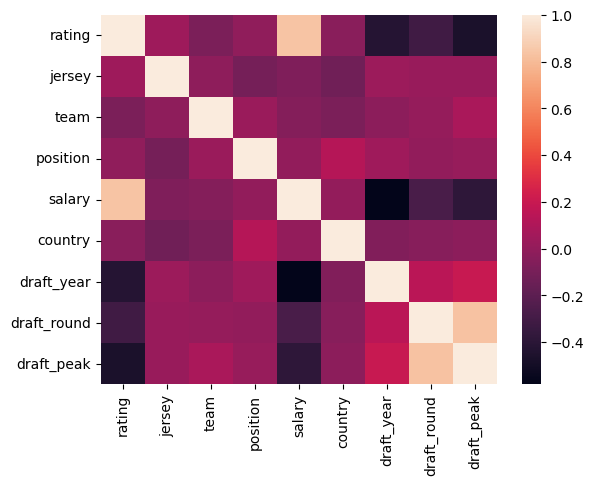

In [27]:
sns.heatmap(dataset.corr())

<Axes: ylabel='salary'>

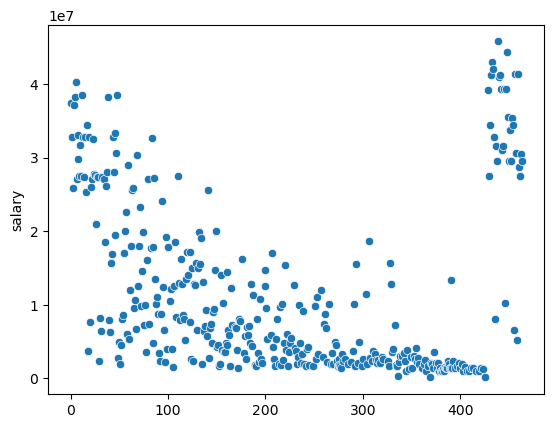

In [28]:
sns.scatterplot(dataset['salary'])

# Model Building and Predictions

In [29]:
xg_model = xg.XGBRegressor()
xg_model.fit(X_train_scal,Y_train)
predictions=xg_model.predict(X_test_scal)

In [30]:
diff=Y_test-predictions

# Analysing Predictions

Text(0.5, 1.0, 'Actual Value vs Predicted Value')

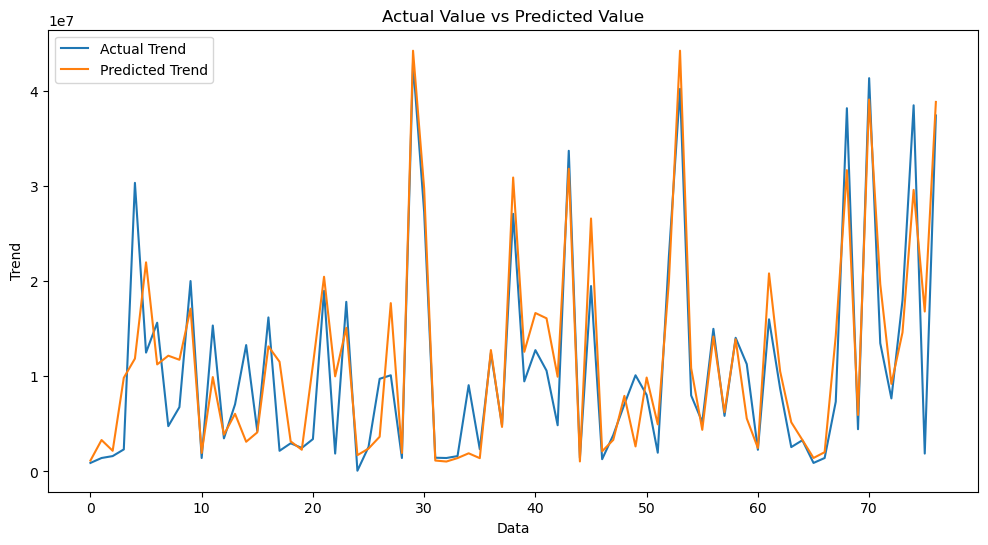

In [31]:
 plt.figure(figsize=(12,6))
 plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
 plt.plot(np.arange(len(Y_test)), predictions, label='Predicted Trend')
 plt.xlabel('Data')
 plt.ylabel('Trend')
 plt.legend()
 plt.title('Actual Value vs Predicted Value')

<Axes: xlabel='salary', ylabel='Density'>

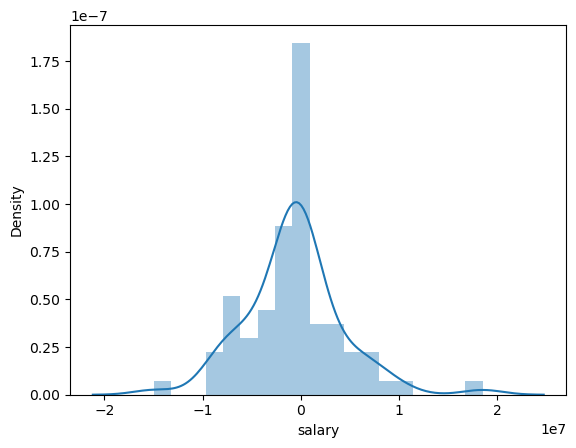

In [32]:
sns.distplot(diff)

In [33]:
import pickle
pickle.dump(xg_model,open('./model.sav','wb'))